# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


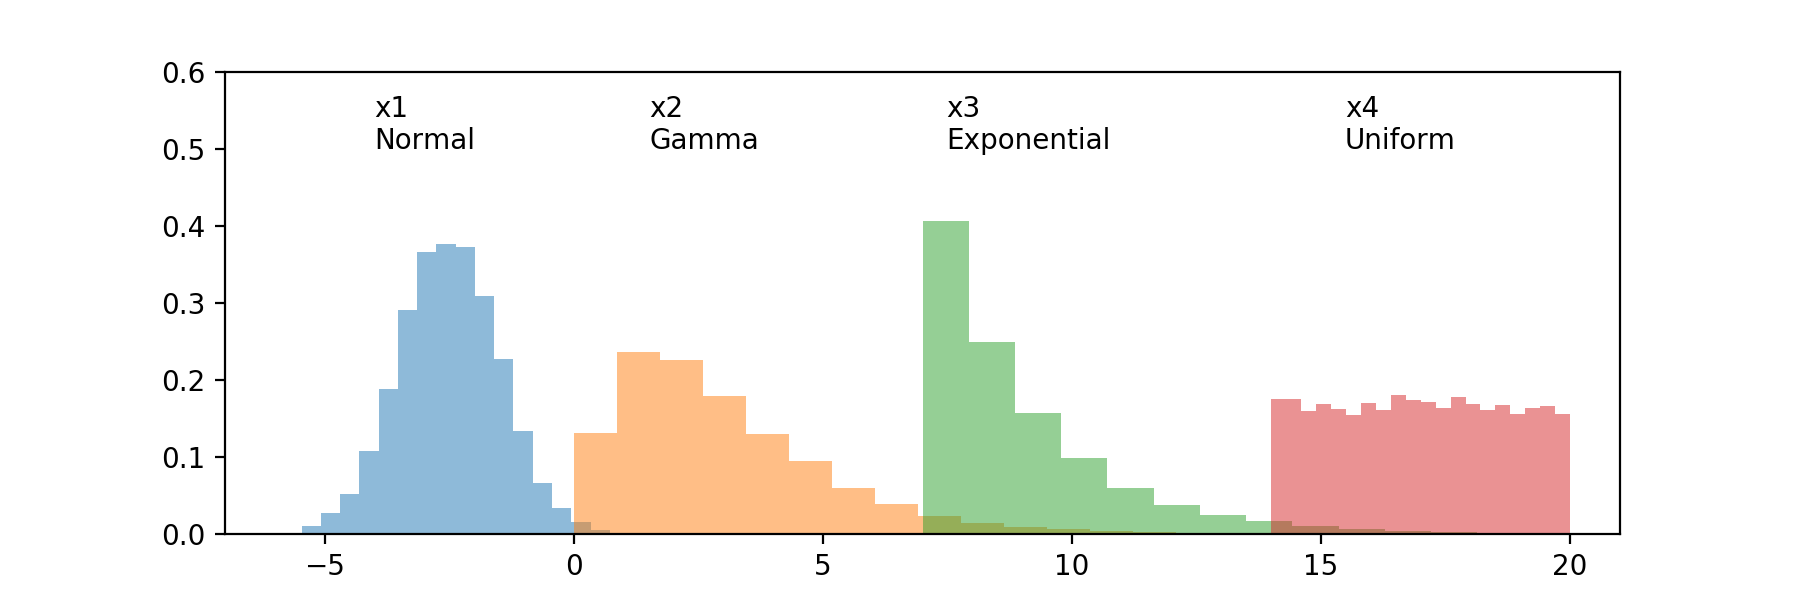

Text(15.479199831825365, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')


<IPython.core.display.Javascript object>


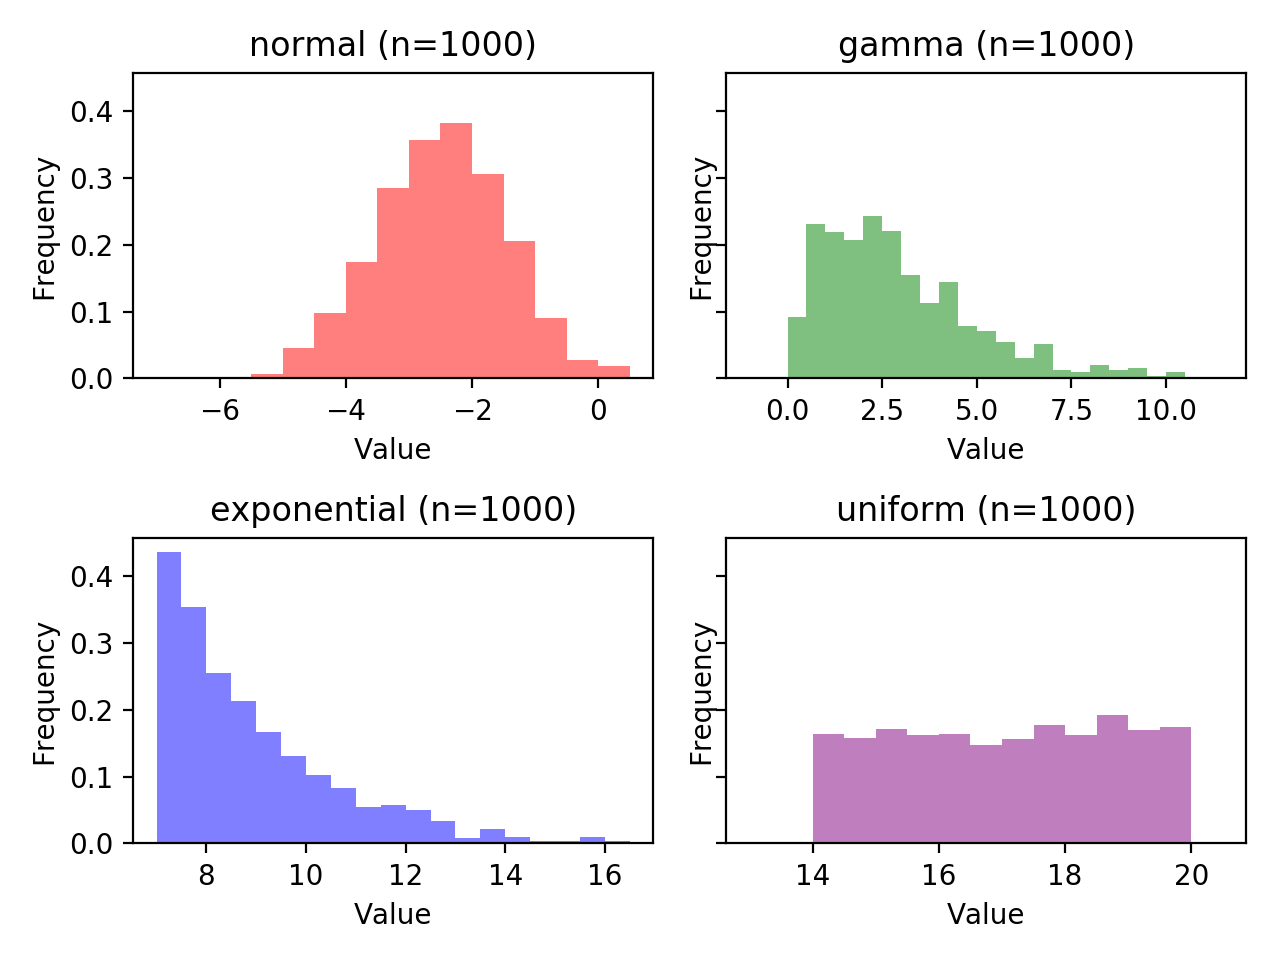

In [5]:
nsample = 10000
x1 = np.random.normal(-2.5, 1, nsample)
x2 = np.random.gamma(2, 1.5, nsample)
x3 = np.random.exponential(2, nsample)+7
x4 = np.random.uniform(14,20, nsample)
x = [x1, x2, x3, x4]

title=['normal','gamma','exponential','uniform']
col=['red','green','blue','purple']
bin1 = np.arange(-7,1,0.5)
bin2 = np.arange(-1,12,0.5)
bin3 = np.arange(7,17,0.5)
bin4 = np.arange(13,21,0.5)
bins = [bin1, bin2, bin3, bin4]

anno_pos_x = [-2, 7, 13, 18]

def update(curr):
    if curr == 10: 
        a.event_source.stop()
    for n in range(0,len(axs)):
        sample = x[n]
        ax=axs[n]
        ax.cla()
        ax.hist(sample[:curr*100], normed=True, bins=bins[n],color=col[n], alpha=0.5)
        ax.set_title(title[n]+' (n={})'.format(curr*100))
        ax.set_ylabel('Frequency')
        ax.set_xlabel('Value')
       
    plt.tight_layout() 
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
axs = [ax1,ax2,ax3,ax4]
a = animation.FuncAnimation(fig, update, interval=800)